# FOR REFERENCE
not used in analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_columns", 60)
%matplotlib inline

In [2]:
def plot_histogram(figsize_tuple, df, feature, filename):
    plt.figure(figsize=figsize_tuple)
    sns.distplot(df[feature].dropna())

    plt.title('Histogram of {}'.format(feature), fontsize=12)
    plt.xlabel('{}'.format(feature), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig('../images/01b-eda-metar-hkg/{}.png'.format(filename), transparent=True)
    
def plot_barchart(figsize_tuple, df, feature, display_top_10, datatype, filename):
    df = df.copy()
    # Plot barchart
    plt.figure(figsize=figsize_tuple)
    
    if datatype == object:
        df[feature] = df[feature].fillna('EMPTY')
    else:
        df[feature] = df[feature].astype(datatype).fillna(-999)
    
    if display_top_10:
        order_arg = df[feature].value_counts().iloc[:10].index
        sns.countplot(y=feature, data=df, orient='v', order=order_arg)
        plt.title('Top 10 {}'.format(feature), fontsize=12)
    else:
        order_arg = df[feature].value_counts().sort_index().index
        sns.countplot(y=feature, data=df, orient='v', order=order_arg)
        plt.title('Barplot of {}'.format(feature), fontsize=12)

    plt.xlabel('Count', fontsize=12)
    plt.ylabel('{}'.format(feature), fontsize=12)
    plt.savefig('../images/01b-eda-metar-hkg/{}.png'.format(filename), transparent=True)

## Read data

In [3]:
hkg_weather = pd.read_csv('../data/metar-vhhh.csv')
hkg_weather.head(2)

station             valid       lon      lat  tmpf  dwpf   relh    drct  \
0    VHHH  2016-12-31 00:00  113.9219  22.3094  60.8  50.0  67.54  110.00   
1    VHHH  2016-12-31 00:30  113.9219  22.3094  64.4  51.8  63.60       M   

   sknt  p01i   alti mslp  vsby gust skyc1 skyc2 skyc3 skyc4    skyl1 skyl2  \
0   4.0   0.0  30.24    M  4.97    M   FEW     M     M     M  4500.00     M   
1   2.0   0.0  30.24    M  4.97    M   FEW     M     M     M  4500.00     M   

  skyl3 skyl4 wxcodes ice_accretion_1hr ice_accretion_3hr ice_accretion_6hr  \
0     M     M       M                 M                 M                 M   
1     M     M       M                 M                 M                 M   

  peak_wind_gust peak_wind_drct peak_wind_time  feel  \
0              M              M              M  60.8   
1              M              M              M  64.4   

                                               metar  
0  VHHH 310000Z 11004KT 8000 FEW045 16/10 Q1024 N...  
1  VHHH 310030Z VRB02KT 8000 FEW045 18/11 Q1024 N...

## Rename columns

In [4]:
hkg_weather.rename(columns={
    'valid': 'timestamp',
    'tmpf': 'air_temp',
    'dwpf': 'dewpoint_temp',
    'relh': 'rel_humidity',
    'drct': 'wind_dir',
    'sknt': 'wind_speed',
    'p01i': 'precipitation',
    'alti': 'altimeter_pressure',
    'mslp': 'sealevel_pressure',
    'vsby': 'visibility',
    'gust': 'gust_speed',
    'skyc1': 'sky_level_1_coverage',
    'skyc2': 'sky_level_2_coverage',
    'skyc3': 'sky_level_3_coverage',
    'skyc4': 'sky_level_4_coverage',
    'skyl1': 'sky_level_1_altitude',
    'skyl2': 'sky_level_2_altitude',
    'skyl3': 'sky_level_3_altitude',
    'skyl4': 'sky_level_4_altitude',
    'wxcodes': 'weather_codes',
    'feel': 'apparent_temp'
}, inplace=True)

In [5]:
hkg_weather.shape

(2920, 31)

In [6]:
hkg_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   station               2920 non-null   object 
 1   timestamp             2920 non-null   object 
 2   lon                   2920 non-null   float64
 3   lat                   2920 non-null   float64
 4   air_temp              2920 non-null   float64
 5   dewpoint_temp         2920 non-null   float64
 6   rel_humidity          2920 non-null   float64
 7   wind_dir              2920 non-null   object 
 8   wind_speed            2920 non-null   float64
 9   precipitation         2920 non-null   float64
 10  altimeter_pressure    2920 non-null   float64
 11  sealevel_pressure     2920 non-null   object 
 12  visibility            2920 non-null   float64
 13  gust_speed            2920 non-null   object 
 14  sky_level_1_coverage  2920 non-null   object 
 15  sky_level_2_coverage 

## Handling null values

In [7]:
hkg_weather.replace('M', np.NaN, inplace=True)

In [8]:
hkg_weather.isnull().sum()

station                    0
timestamp                  0
lon                        0
lat                        0
air_temp                   0
dewpoint_temp              0
rel_humidity               0
wind_dir                 114
wind_speed                 0
precipitation              0
altimeter_pressure         0
sealevel_pressure       2920
visibility                 0
gust_speed              2915
sky_level_1_coverage     446
sky_level_2_coverage    1582
sky_level_3_coverage    2912
sky_level_4_coverage    2920
sky_level_1_altitude     577
sky_level_2_altitude    1582
sky_level_3_altitude    2912
sky_level_4_altitude    2920
weather_codes           2511
ice_accretion_1hr       2920
ice_accretion_3hr       2920
ice_accretion_6hr       2920
peak_wind_gust          2920
peak_wind_drct          2920
peak_wind_time          2920
apparent_temp              0
metar                      0
dtype: int64

In [9]:
hkg_weather.isnull().sum() / hkg_weather.shape[0] * 100

station                   0.000000
timestamp                 0.000000
lon                       0.000000
lat                       0.000000
air_temp                  0.000000
dewpoint_temp             0.000000
rel_humidity              0.000000
wind_dir                  3.904110
wind_speed                0.000000
precipitation             0.000000
altimeter_pressure        0.000000
sealevel_pressure       100.000000
visibility                0.000000
gust_speed               99.828767
sky_level_1_coverage     15.273973
sky_level_2_coverage     54.178082
sky_level_3_coverage     99.726027
sky_level_4_coverage    100.000000
sky_level_1_altitude     19.760274
sky_level_2_altitude     54.178082
sky_level_3_altitude     99.726027
sky_level_4_altitude    100.000000
weather_codes            85.993151
ice_accretion_1hr       100.000000
ice_accretion_3hr       100.000000
ice_accretion_6hr       100.000000
peak_wind_gust          100.000000
peak_wind_drct          100.000000
peak_wind_time      

In [10]:
# Drop features with 100% NaN values
hkg_weather.drop(['sealevel_pressure', 
                  'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
                  'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time'], axis=1, inplace=True)

hkg_weather.drop(['metar'], axis=1, inplace=True)

# hkg_weather.drop(['precipitation'], axis=1, inplace=True)

# hkg_weather.drop(['sky_level_2_coverage', 'sky_level_3_coverage', 'sky_level_4_coverage',
#                   'sky_level_2_altitude', 'sky_level_3_altitude', 'sky_level_4_altitude'], 
#                   axis=1, inplace=True)

# hkg_weather.timestamp = pd.to_datetime(hkg_weather.timestamp)

# hkg_weather.wind_dir = pd.to_numeric(hkg_weather.wind_dir, errors='coerce').astype('Int64')

# hkg_weather.gust_speed = pd.to_numeric(hkg_weather.gust_speed, errors='coerce').astype('Int64')
# hkg_weather.gust_speed = hkg_weather.gust_speed.fillna(0)

# hkg_weather.wind_dir = hkg_weather.wind_dir.fillna(method='ffill')

# hkg_weather.sky_level_1_coverage = hkg_weather.sky_level_1_coverage.fillna(method='ffill')
# hkg_weather.sky_level_1_altitude = hkg_weather.sky_level_1_altitude.fillna(method='ffill')

In [11]:
hkg_weather.isnull().sum() / hkg_weather.shape[0] * 100

station                   0.000000
timestamp                 0.000000
lon                       0.000000
lat                       0.000000
air_temp                  0.000000
dewpoint_temp             0.000000
rel_humidity              0.000000
wind_dir                  3.904110
wind_speed                0.000000
precipitation             0.000000
altimeter_pressure        0.000000
visibility                0.000000
gust_speed               99.828767
sky_level_1_coverage     15.273973
sky_level_2_coverage     54.178082
sky_level_3_coverage     99.726027
sky_level_4_coverage    100.000000
sky_level_1_altitude     19.760274
sky_level_2_altitude     54.178082
sky_level_3_altitude     99.726027
sky_level_4_altitude    100.000000
weather_codes            85.993151
apparent_temp             0.000000
dtype: float64

## station
three or four character site identifier

In [12]:
hkg_weather.station.value_counts()

VHHH    2920
Name: station, dtype: int64

## timestamp
timestamp of observation

In [13]:
hkg_weather.timestamp = pd.to_datetime(hkg_weather.timestamp)

In [14]:
hkg_weather.timestamp.sort_values()

0      2016-12-31 00:00:00
1      2016-12-31 00:30:00
2      2016-12-31 01:00:00
3      2016-12-31 01:30:00
4      2016-12-31 02:00:00
               ...        
2915   2017-02-27 21:30:00
2916   2017-02-27 22:00:00
2917   2017-02-27 22:30:00
2918   2017-02-27 23:00:00
2919   2017-02-27 23:30:00
Name: timestamp, Length: 2920, dtype: datetime64[ns]

## air_temp
Air Temperature in Fahrenheit, typically @ 2 meters

In [15]:
hkg_weather.air_temp.dtype

dtype('float64')

In [16]:
hkg_weather.air_temp.value_counts().sort_index()

50.0     31
51.8     68
53.6     77
55.4     42
57.2    127
59.0    152
60.8    190
62.6    296
64.4    362
66.2    394
68.0    407
69.8    318
71.6    197
73.4    114
75.2     83
77.0     51
78.8     10
80.6      1
Name: air_temp, dtype: int64

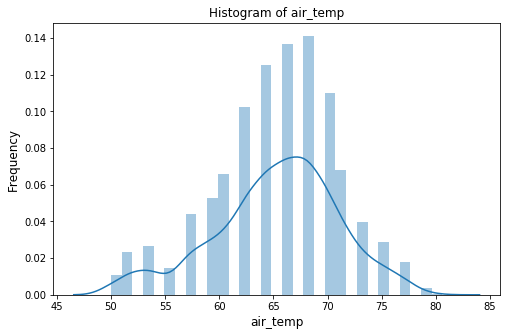

In [17]:
plot_histogram((8, 5), hkg_weather, 'air_temp', '01-histogram-air_temp')

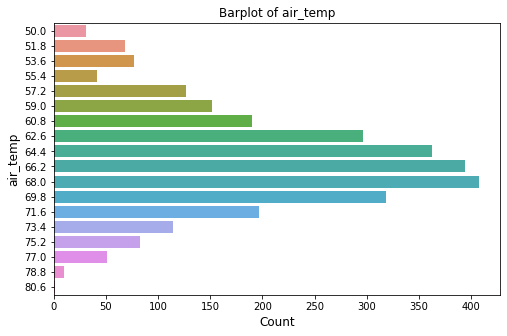

In [18]:
plot_barchart((8, 5), hkg_weather, 'air_temp', False, float, '01-barchart-air_temp')

The most frequent air_temp is 68 deg Fahrenheit.

## dewpoint_temp
Dew Point Temperature in Fahrenheit, typically @ 2 meters

In [19]:
hkg_weather.dewpoint_temp.dtype

dtype('float64')

In [20]:
hkg_weather.dewpoint_temp.value_counts().sort_index()

28.4      1
30.2      4
32.0     59
33.8     25
35.6     21
37.4     41
39.2     26
41.0     39
42.8     60
44.6     85
46.4    120
48.2    157
50.0    120
51.8    229
53.6    331
55.4    267
57.2    243
59.0    321
60.8    287
62.6    225
64.4    153
66.2    106
Name: dewpoint_temp, dtype: int64

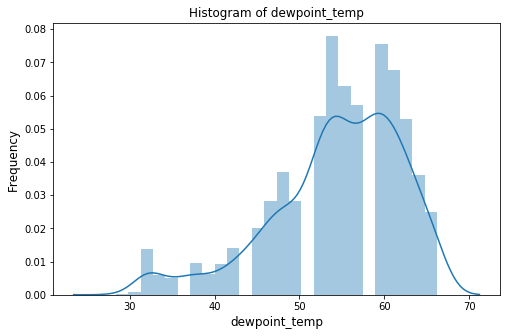

In [21]:
plot_histogram((8, 5), hkg_weather, 'dewpoint_temp', '02-histogram-dewpoint_temp')

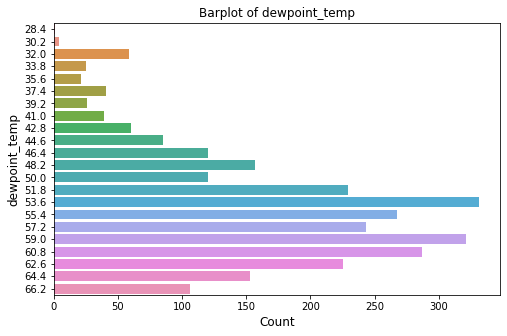

In [22]:
plot_barchart((8, 5), hkg_weather, 'dewpoint_temp', False, float, '02-barchart-dewpoint_temp')

The most frequent dewpoint_temp is 51.8 deg Fahrenheit.

## rel_humidity
Relative Humidity in %

In [23]:
hkg_weather.rel_humidity.dtype

dtype('float64')

In [24]:
hkg_weather.rel_humidity.value_counts().sort_index()

28.39      1
30.20      4
30.49      1
30.77      2
32.43      4
          ..
93.83     12
93.88      9
93.92      8
93.97     20
100.00     6
Name: rel_humidity, Length: 208, dtype: int64

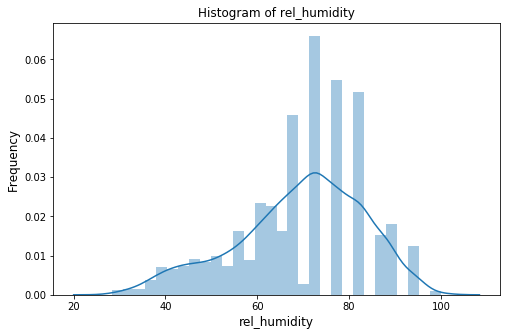

In [25]:
plot_histogram((8, 5), hkg_weather, 'rel_humidity', '03-histogram-rel_humidity')

The distribution of rel_humidity is not normal and is left-skewed.

## wind_dir
Wind Direction in degrees from north

In [26]:
hkg_weather.wind_dir.dtype

dtype('O')

In [27]:
hkg_weather.wind_dir = pd.to_numeric(hkg_weather.wind_dir, errors='coerce').astype('Int64')

In [28]:
hkg_weather.wind_dir.isnull().sum()

114

In [29]:
hkg_weather.wind_dir.value_counts(dropna=False).sort_index()

10      98
20      80
30      84
40     139
50     156
60     126
70     147
80     200
90     284
100    351
110    253
120     63
130     31
140     12
150      6
160      9
170     10
180      3
190      4
200      4
210      1
220      1
230      3
240     15
250     12
260     42
270     72
280     40
290     39
300     53
310     31
320     79
330    110
340     82
350     72
360     94
NaN    114
Name: wind_dir, dtype: Int64

In [30]:
hkg_weather.wind_dir[hkg_weather.wind_dir.isnull()].index

Int64Index([   1,   20,   22,  120,  131,  139,  141,  144,  204,  208,
            ...
            2623, 2627, 2635, 2636, 2637, 2644, 2723, 2846, 2847, 2854],
           dtype='int64', length=114)

In [31]:
hkg_weather.loc[0:5, ['timestamp', 'wind_dir']]

timestamp  wind_dir
0 2016-12-31 00:00:00       110
1 2016-12-31 00:30:00      <NA>
2 2016-12-31 01:00:00        50
3 2016-12-31 01:30:00        40
4 2016-12-31 02:00:00        30
5 2016-12-31 02:30:00       350

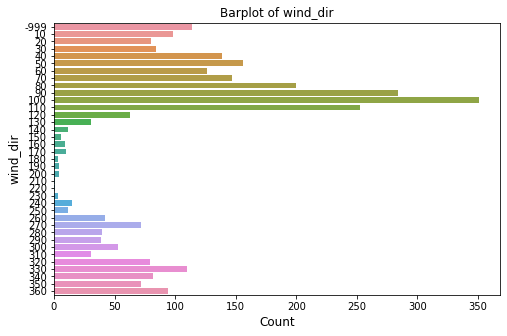

In [32]:
plot_barchart((8, 5), hkg_weather, 'wind_dir', False, 'Int32', '04-barchart-wind_dir')

The most frequent value of wind_dir is 100.

## wind_speed
Wind Speed in knots

In [33]:
hkg_weather.wind_speed.dtype

dtype('float64')

In [34]:
hkg_weather.wind_speed.isnull().sum()

0

In [35]:
hkg_weather.wind_speed.min()

0.0

In [36]:
hkg_weather.wind_speed.max()

25.0

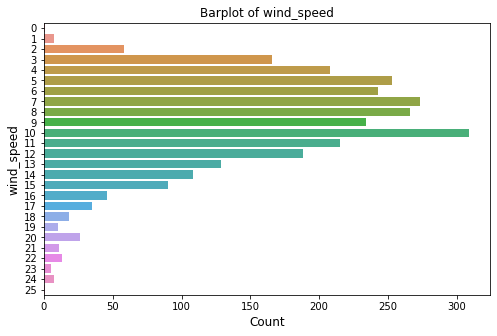

In [37]:
plot_barchart((8, 5), hkg_weather, 'wind_speed', False, int, '05-barchart-wind_speed')

The most frequent value of wind_speed is 10.

## precipitation
One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.

In [38]:
hkg_weather.precipitation.dtype

dtype('float64')

In [39]:
hkg_weather.precipitation.isnull().sum()

0

In [40]:
hkg_weather.precipitation.min()

0.0

In [41]:
hkg_weather.precipitation.max()

0.0

In [42]:
# Handling precipitation
hkg_weather.drop(['precipitation'], axis=1, inplace=True)

## altimeter_pressure
Pressure altimeter in inches

In [43]:
hkg_weather.altimeter_pressure.dtype

dtype('float64')

In [44]:
hkg_weather.altimeter_pressure.isnull().sum()

0

In [45]:
hkg_weather.altimeter_pressure.min()

29.85

In [46]:
hkg_weather.altimeter_pressure.max()

30.42

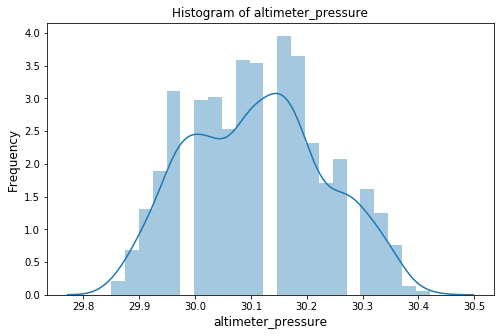

In [47]:
plot_histogram((8, 5), hkg_weather, 'altimeter_pressure', '06-histogram-altimeter_pressure')

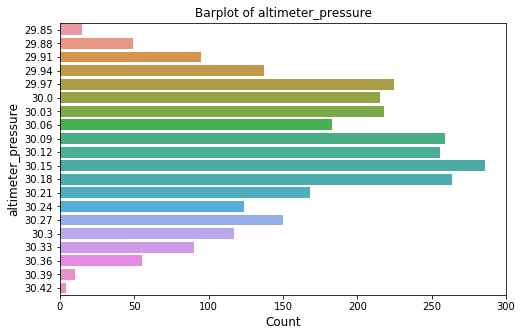

In [48]:
plot_barchart((8, 5), hkg_weather, 'altimeter_pressure', False, float, '06-barchart-altimeter_pressure')

The most frequent value of altimeter_pressure is 30.15.

## visibility
Visibility in miles

In [49]:
hkg_weather.visibility.min()

0.81

In [50]:
hkg_weather.visibility.max()

6.21

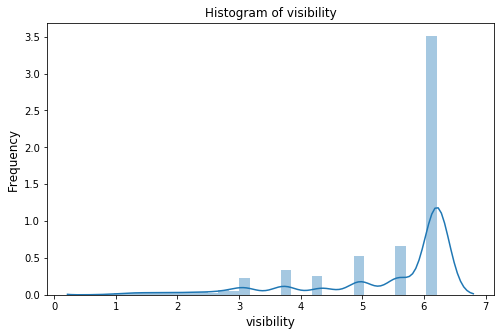

In [51]:
plot_histogram((8, 5), hkg_weather, 'visibility', '07-histogram-visibility')

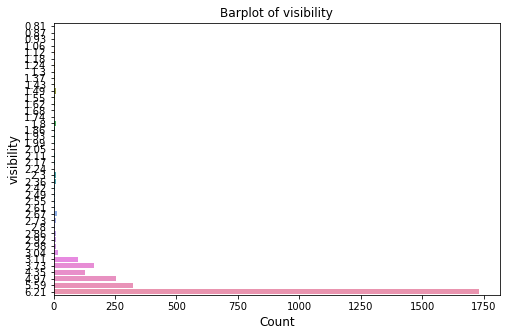

In [52]:
plot_barchart((8, 5), hkg_weather, 'visibility', False, float, '07-barchart-visibility')

The most frequent value of visibility is 6.21.

## gust_speed
Wind Gust in knots

In [53]:
hkg_weather.gust_speed.isnull().sum()

2915

In [54]:
hkg_weather.gust_speed.value_counts(dropna=False).sort_index()

19.00       1
25.00       1
27.00       1
32.00       2
NaN      2915
Name: gust_speed, dtype: int64

In [55]:
hkg_weather.gust_speed = pd.to_numeric(hkg_weather.gust_speed, errors='coerce').astype('Int64')
hkg_weather.gust_speed = hkg_weather.gust_speed.fillna(0)

## sky_level_1_coverage
Sky Level 1 Coverage

In [56]:
hkg_weather.sky_level_1_coverage.value_counts(dropna=False).sort_index()

FEW    2307
NSC     131
SCT      36
NaN     446
Name: sky_level_1_coverage, dtype: int64

In [57]:
hkg_weather.sky_level_1_coverage[hkg_weather.sky_level_1_coverage.isnull()].index

Int64Index([  77,   78,   79,   80,   81,   82,   83,   84,   88,   91,
            ...
            2882, 2883, 2884, 2885, 2891, 2907, 2908, 2909, 2910, 2911],
           dtype='int64', length=446)

In [58]:
hkg_weather.loc[74:87, ['timestamp', 'sky_level_1_coverage']]

timestamp sky_level_1_coverage
74 2017-01-01 13:00:00                  FEW
75 2017-01-01 13:30:00                  FEW
76 2017-01-01 14:00:00                  FEW
77 2017-01-01 14:30:00                  NaN
78 2017-01-01 15:00:00                  NaN
79 2017-01-01 15:30:00                  NaN
80 2017-01-01 16:00:00                  NaN
81 2017-01-01 16:30:00                  NaN
82 2017-01-01 17:00:00                  NaN
83 2017-01-01 17:30:00                  NaN
84 2017-01-01 18:00:00                  NaN
85 2017-01-01 18:30:00                  NSC
86 2017-01-01 19:00:00                  NSC
87 2017-01-01 19:30:00                  NSC

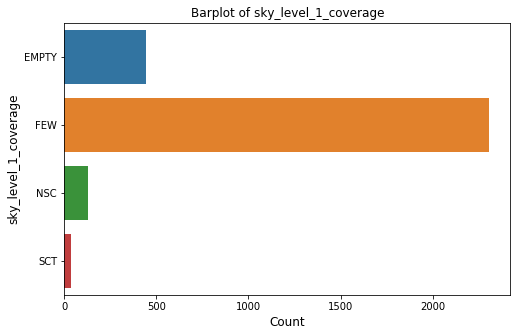

In [59]:
plot_barchart((8, 5), hkg_weather, 'sky_level_1_coverage', False, object, '08-barchart-sky_level_1_coverage')

The most frequent value of sky_level_1_coverage is FEW.

In [60]:
# Handling NaN
# hkg_weather.sky_level_1_coverage = hkg_weather.sky_level_1_coverage.fillna(method='ffill')

## sky_level_2_coverage
Sky Level 2 Coverage

In [61]:
hkg_weather.sky_level_2_coverage.value_counts(dropna=False).sort_index()

SCT    1338
NaN    1582
Name: sky_level_2_coverage, dtype: int64

In [62]:
hkg_weather.sky_level_2_coverage[hkg_weather.sky_level_2_coverage.isnull()].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', length=1582)

In [63]:
hkg_weather.loc[30:50, ['timestamp', 'sky_level_2_coverage']]

timestamp sky_level_2_coverage
30 2016-12-31 15:00:00                  NaN
31 2016-12-31 15:30:00                  NaN
32 2016-12-31 16:00:00                  NaN
33 2016-12-31 16:30:00                  SCT
34 2016-12-31 17:00:00                  SCT
35 2016-12-31 17:30:00                  SCT
36 2016-12-31 18:00:00                  SCT
37 2016-12-31 18:30:00                  SCT
38 2016-12-31 19:00:00                  SCT
39 2016-12-31 19:30:00                  SCT
40 2016-12-31 20:00:00                  SCT
41 2016-12-31 20:30:00                  SCT
42 2016-12-31 21:00:00                  SCT
43 2016-12-31 21:30:00                  SCT
44 2016-12-31 22:00:00                  SCT
45 2016-12-31 22:30:00                  SCT
46 2016-12-31 23:00:00                  SCT
47 2016-12-31 23:30:00                  SCT
48 2017-01-01 00:00:00                  SCT
49 2017-01-01 00:30:00                  SCT
50 2017-01-01 01:00:00                  SCT

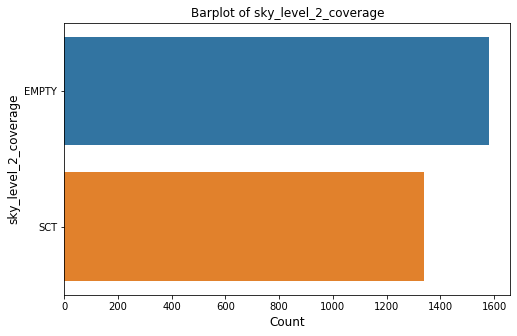

In [64]:
plot_barchart((8, 5), hkg_weather, 'sky_level_2_coverage', False, object, '09-barchart-sky_level_2_coverage')

In [65]:
# Handling NaN (DROP)
# hkg_weather.drop(columns=['sky_level_2_coverage'], axis=1, inplace=True)

## sky_level_1_altitude

In [66]:
hkg_weather.sky_level_1_altitude = pd.to_numeric(hkg_weather.sky_level_1_altitude, errors='coerce').astype('Int64')

In [67]:
hkg_weather.sky_level_1_altitude.value_counts(dropna=False).sort_index()

500      24
600      58
700      17
800     178
900      55
1000    205
1100      1
1200    142
1300     16
1400     42
1500    147
1600     67
1700      2
1800    150
2000    102
2200    107
2300      2
2400      1
2500    215
2600     16
2800     19
3000    230
3500    269
4000    133
4500    145
NaN     577
Name: sky_level_1_altitude, dtype: Int64

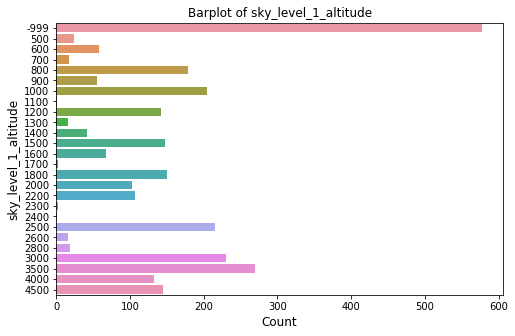

In [68]:
plot_barchart((8, 5), hkg_weather, 'sky_level_1_altitude', False, 'Int64', '10-barchart-sky_level_1_altitude')

In [69]:
hkg_weather.sky_level_1_altitude[hkg_weather.sky_level_1_altitude.isnull()].index

Int64Index([  77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
            ...
            2882, 2883, 2884, 2885, 2891, 2907, 2908, 2909, 2910, 2911],
           dtype='int64', length=577)

In [70]:
hkg_weather.loc[70:100, ['timestamp', 'sky_level_1_altitude']]

timestamp  sky_level_1_altitude
70  2017-01-01 11:00:00                  2200
71  2017-01-01 11:30:00                  2500
72  2017-01-01 12:00:00                  2500
73  2017-01-01 12:30:00                  2500
74  2017-01-01 13:00:00                  2500
75  2017-01-01 13:30:00                  2500
76  2017-01-01 14:00:00                  2500
77  2017-01-01 14:30:00                  <NA>
78  2017-01-01 15:00:00                  <NA>
79  2017-01-01 15:30:00                  <NA>
80  2017-01-01 16:00:00                  <NA>
81  2017-01-01 16:30:00                  <NA>
82  2017-01-01 17:00:00                  <NA>
83  2017-01-01 17:30:00                  <NA>
84  2017-01-01 18:00:00                  <NA>
85  2017-01-01 18:30:00                  <NA>
86  2017-01-01 19:00:00                  <NA>
87  2017-01-01 19:30:00                  <NA>
88  2017-01-01 20:00:00                  <NA>
89  2017-01-01 20:30:00                  <NA>
90  2017-01-01 21:00:00                  <NA>
91  2017-01-01 21:30:00                  <NA>
92  2017-01-01 22:00:00                  <NA>
93  2017-01-01 22:30:00                  <NA>
94  2017-01-01 23:00:00                  <NA>
95  2017-01-01 23:30:00                  2200
96  2017-01-02 00:00:00                  2200
97  2017-01-02 00:30:00                  2200
98  2017-01-02 01:00:00                  2200
99  2017-01-02 01:30:00                  2200
100 2017-01-02 02:00:00                  2200

In [71]:
hkg_weather.drop(['sky_level_2_coverage', 'sky_level_3_coverage', 'sky_level_4_coverage',
                  'sky_level_2_altitude', 'sky_level_3_altitude', 'sky_level_4_altitude'], 
                  axis=1, inplace=True)

## weather_codes
Present Weather Codes (space seperated)

In [72]:
hkg_weather.weather_codes.value_counts(dropna=False)

NaN           2511
-RA            150
BR             103
HZ              61
-DZ             29
-RA BR          26
-DZ BR          15
RA               6
-SHRA            4
BR -RA           4
TSRA             3
BR -DZ           1
SHRA VCTS        1
+SHRA VCTS       1
SHRA             1
VCTS -SHRA       1
+TSRA            1
-RA -BR          1
DZ BR            1
Name: weather_codes, dtype: int64

In [73]:
hkg_weather.weather_codes = hkg_weather.weather_codes.fillna('')

In [74]:
# Count Vectorize

# Instantiate a CountVectorizer
cvec = CountVectorizer(token_pattern=r'(?u)[\w+-]+')

# Fit the vectorizer on our corpus
cvec.fit(hkg_weather['weather_codes'])

# Transform the corpus
X_weather_codes = cvec.transform(hkg_weather['weather_codes'])

# Convert X_train into a DataFrame
X_weather_codes_df = pd.DataFrame(X_weather_codes.toarray(),
                                  columns=list(map(lambda x: "weather_codes_" + x.upper(), cvec.get_feature_names())))
X_weather_codes_df

weather_codes_+SHRA  weather_codes_+TSRA  weather_codes_-BR  \
0                       0                    0                  0   
1                       0                    0                  0   
2                       0                    0                  0   
3                       0                    0                  0   
4                       0                    0                  0   
...                   ...                  ...                ...   
2915                    0                    0                  0   
2916                    0                    0                  0   
2917                    0                    0                  0   
2918                    0                    0                  0   
2919                    0                    0                  0   

      weather_codes_-DZ  weather_codes_-RA  weather_codes_-SHRA  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   
...                 ...                ...                  ...   
2915                  0                  0                    0   
2916                  0                  0                    0   
2917                  0                  0                    0   
2918                  0                  0                    0   
2919                  0                  0                    0   

      weather_codes_BR  weather_codes_DZ  weather_codes_HZ  weather_codes_RA  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
2915                 0                 0                 0                 0   
2916                 0                 0                 0                 0   
2917                 0                 0                 0                 0   
2918                 0                 0                 0                 0   
2919                 0                 0                 0                 0   

      weather_codes_SHRA  weather_codes_TSRA  weather_codes_VCTS  
0                      0                   0                   0  
1                      0                   0                   0  
2                      0                   0                   0  
3                      0                   0                   0  
4                      0                   0                   0  
...                  ...                 ...                 ...  
2915                   0                   0                   0  
2916                   0                   0                   0  
2917                   0                   0                   0  
2918                   0                   0                   0  
2919                   0                   0                   0  

[2920 rows x 13 columns]

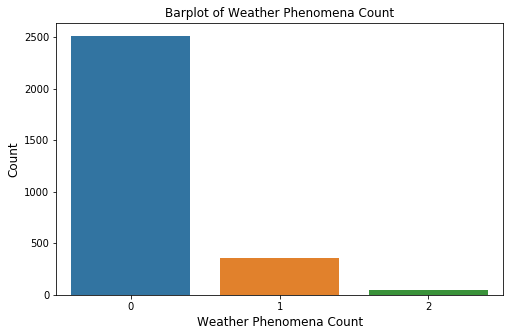

In [75]:
X_weather_num_series = X_weather_codes_df.sum(axis=1).value_counts()

# Plot barchart

plt.figure(figsize=(8, 5))
sns.barplot(X_weather_num_series.index, X_weather_num_series.values)

plt.title('Barplot of Weather Phenomena Count', fontsize=12)
plt.xlabel('Weather Phenomena Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/01b-eda-metar-hkg/11-barchart-weather_phenomena_count.png', transparent=True)

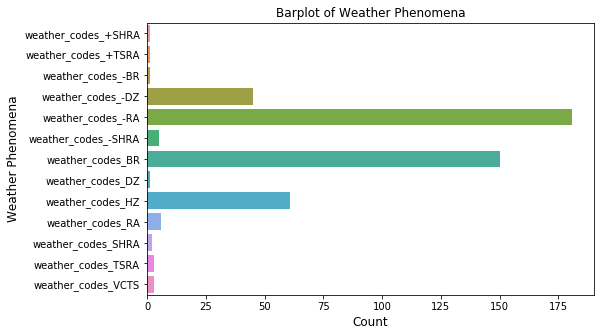

In [76]:
X_weather_series = X_weather_codes_df.sum(axis=0)

# Plot barchart
plt.figure(figsize=(8, 5))
sns.barplot(X_weather_series.values, X_weather_series.index)

plt.title('Barplot of Weather Phenomena', fontsize=12)
plt.ylabel('Weather Phenomena', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/01b-eda-metar-hkg/12-barchart-weather_phenomena.png', transparent=True)

In [77]:
hkg_weather = pd.concat([hkg_weather, X_weather_codes_df], axis=1)

## apparent_temp
Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit

In [78]:
hkg_weather.apparent_temp.min()

44.36

In [79]:
hkg_weather.apparent_temp.max()

81.46

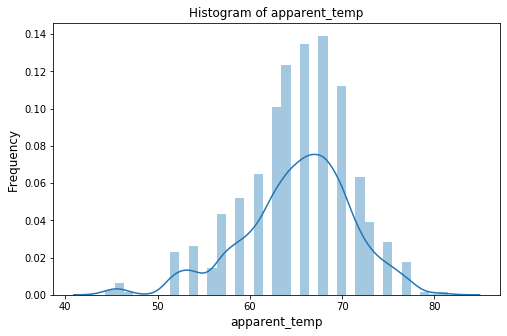

In [80]:
plot_histogram((8, 5), hkg_weather, 'apparent_temp', '13-histogram-apparent_temp')

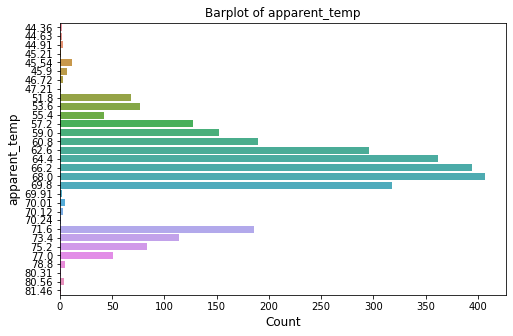

In [81]:
plot_barchart((8, 5), hkg_weather, 'apparent_temp', False, float, '14-barchart-apparent_temp')

The most frequent value of apparent_temp is 66.2.

## Handling null values

In [82]:
hkg_weather.isnull().sum()

station                   0
timestamp                 0
lon                       0
lat                       0
air_temp                  0
dewpoint_temp             0
rel_humidity              0
wind_dir                114
wind_speed                0
altimeter_pressure        0
visibility                0
gust_speed                0
sky_level_1_coverage    446
sky_level_1_altitude    577
weather_codes             0
apparent_temp             0
weather_codes_+SHRA       0
weather_codes_+TSRA       0
weather_codes_-BR         0
weather_codes_-DZ         0
weather_codes_-RA         0
weather_codes_-SHRA       0
weather_codes_BR          0
weather_codes_DZ          0
weather_codes_HZ          0
weather_codes_RA          0
weather_codes_SHRA        0
weather_codes_TSRA        0
weather_codes_VCTS        0
dtype: int64

In [83]:
hkg_weather.wind_dir = hkg_weather.wind_dir.fillna(method='ffill')
hkg_weather.sky_level_1_coverage = hkg_weather.sky_level_1_coverage.fillna(method='ffill')
hkg_weather.sky_level_1_altitude = hkg_weather.sky_level_1_altitude.fillna(method='ffill')

In [84]:
# hkg_weather.loc[(hkg_weather.valid.dt.minute != 0) & (hkg_weather.valid.dt.minute != 30)].index.tolist()

In [85]:
# hkg_weather.loc[75:78]

In [86]:
# start_dt = dt.datetime(2016, 12, 31, 0, 0, 0)
# + dt.timedelta(minutes=30)

In [87]:
hkg_weather_resampled = hkg_weather.set_index('timestamp').resample('30Min').first()

In [88]:
hkg_weather_resampled.reset_index(inplace=True)

In [89]:
hkg_weather_resampled.isnull().sum()

timestamp                0
station                 14
lon                     14
lat                     14
air_temp                14
dewpoint_temp           14
rel_humidity            14
wind_dir                14
wind_speed              14
altimeter_pressure      14
visibility              14
gust_speed              14
sky_level_1_coverage    14
sky_level_1_altitude    14
weather_codes           14
apparent_temp           14
weather_codes_+SHRA     14
weather_codes_+TSRA     14
weather_codes_-BR       14
weather_codes_-DZ       14
weather_codes_-RA       14
weather_codes_-SHRA     14
weather_codes_BR        14
weather_codes_DZ        14
weather_codes_HZ        14
weather_codes_RA        14
weather_codes_SHRA      14
weather_codes_TSRA      14
weather_codes_VCTS      14
dtype: int64

In [90]:
hkg_weather_resampled.fillna(method='ffill', inplace=True)

In [91]:
hkg_weather_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2832 non-null   datetime64[ns]
 1   station               2832 non-null   object        
 2   lon                   2832 non-null   float64       
 3   lat                   2832 non-null   float64       
 4   air_temp              2832 non-null   float64       
 5   dewpoint_temp         2832 non-null   float64       
 6   rel_humidity          2832 non-null   float64       
 7   wind_dir              2832 non-null   Int64         
 8   wind_speed            2832 non-null   float64       
 9   altimeter_pressure    2832 non-null   float64       
 10  visibility            2832 non-null   float64       
 11  gust_speed            2832 non-null   Int64         
 12  sky_level_1_coverage  2832 non-null   object        
 13  sky_level_1_altitu

In [92]:
hkg_weather_resampled.to_csv('../data/metar-vhhh-clean.csv')